# Welcome to the course!

This is meant to be a very broad overview of machine learning topics, hopefully enough that you can hold a conversation about the topics we cover, but probably not enough to land a job as an ML engineer. There will be resources at the end if you want to know more :) 


## Schedule 

1. General Overview
2. Fitting Models
3. Validating Models
4. Interpreting Results
5. Wrapping Up

## Pre-reqs
1. Watch this Essence of Linear Algebra playlist: https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab
2. Working intermediate Python knowledge (but if you're rusty that's okay, I am too)
   - in particular, basic understanding of numpy, pandas, scipy, statsmodels, scikitlearn
   - if you aren't familiar with some of these, that's okay too, just look over their documentation

# Math Interlude 

Math can be scary, believe me, I understand. But fundamentally, machine learning is using some fancy-looking math to make predictions about things we're interested in. If you don't have a formal math background, that's okay too, but I want to get some concepts reviewed so you can make sense of formulas and notation you see in other resources.

notation

\begin{pmatrix}
x_{11} & x_{12} \\
x_{21} & x_{22}
\end{pmatrix}

Also note the subscripts, those are used pretty frequently to denote "different" objects of the same type. So we might want to compare means (averages) between two different groups of people. Instead of saying "mean of people x vs mean of people y" we usually just write this: 

$\mu_1$ vs. $\mu_2$

This is read as "mu 1 vs. mu 2" or "mu-sub-1 vs. mu-sub-2"

You will also often see a variety of letters used to denote "arbitrary" numbers. This sounds insane at first, because, why would we talk about hypothetical numbers? But they're often used to generalize models to an arbitrary number of variables, parameters, whatever. For example, if we want to describe a linear model to someone, and we say "just use every variable you have" we can write: fit the model with $x_1, x_2, \dots x_j$. The $j$ here is just a placeholder value. If we have &j = 5& variables, we would write $x_1, x_2, x_3, x_4, x_5$. Some common letters for this type of mathematical writing are $n$, $m$, $j$, $k$, and many others, but helpful to stick to those because they're convention. 

If you get more into ML, it will be essential to either take a linear algebra course or just read a textbook, but just being aware of the concepts is enough for now :) 

# General Overview

What is machine learning? 

*"a field of study in artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalize to unseen data, and thus perform tasks without explicit instructions"* (wikipedia)

There are 3 main types: 

1. Supervised learning
2. Unsupervised learning
3. Reinforcement learning

There are plenty of other types and subfields, but these three categories cover most of it. Almost everything uses some blend of math, statistics, probability, and programming to create a machine learning model. 

I am a statistician by training, and we really like linear models, so some of this may be slightly more statistics-focused, and I will definitely use statistics-based notation. There are usually many different ways to write mathematical formulas depending on the field, even though they share similar ideas.

In [5]:
import sklearn 
import pandas as pd 
import numpy as np 
import statsmodels as sm 
import matplotlib.pyplot as plt

## Supervised learning: a basic example

This is "supervised" in the sense that we have a known outcome variable, often denoted $Y$. The most basic type of supervised learning is a linear model, you may have seen these before. In two dimensions, this is just $y = mx + b$ where: 

\begin{aligned}
y &= \text{outcome variable} \\ 
m &= \text{slope} \\ 
x &= \text{our predictor variable} \\ 
b &= \text{intercept}
\end{aligned}

Note that there are 100 names for $x$ and $y$, here are some of them. x is called a covariate, an independent variable, a predictor variable, or just "x". y is called the target variable, the dependent variable, the outcome variable, "variable of interest", "endpoint" (in clinical trials), or just "y". The b's or betas are almost always called coefficients or betas, though in other ML models they can be called parameters or weights. But trust me, it's kind of arbitrary. 

Say you, a normal person, go out and dig up 50 earthworms in your neighborhood, weigh them and measure them, and put them back in the ground. This is your data: 

In [41]:
# here's our data 
df = pd.DataFrame({'weight_mg' : np.round(x), 'length_cm' : np.round(y, 2)})
df.head()

,weight_mg,length_cm
0,155.0,2.32
1,172.0,2.42
2,160.0,2.59
3,154.0,2.09
4,142.0,2.02


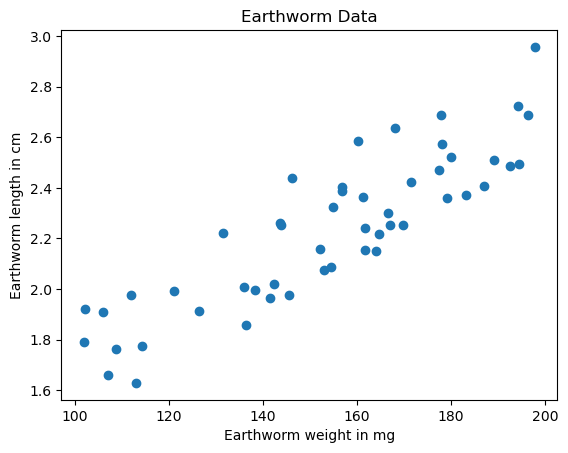

In [38]:
# Generate random data
np.random.seed(0)  # For reproducibility
x = np.random.uniform(100, 200, 50)
y = np.random.uniform(0.5, 1, 50) + (x - 1) * 0.01

# Plotting the points
plt.scatter(x, y)
plt.title("Earthworm Data")
plt.xlabel("Earthworm weight in mg")
plt.ylabel("Earthworm length in cm")
plt.show()

If we wanted to write our mathematical formula for fitting a model to this data, we would write: 

$y_{\text{length}} = \beta_0 + \beta_1 \cdot x_{\text{weight}}$ (notice that this is just y = mx + b)! 

## Fitting our first model!

Are you ready for the big reveal? When we say "fitting a model" or you hear someone say they have a machine learning model, they just have coefficient estimates. That's all it is, that's the whole game. 